___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.


# PART- 1 `( Data Cleaning )`

In [25]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import json
import re

In [26]:
df = pd.read_json('scout_car.json', lines=True) # lines=True ile satır satır okumasını sağlar.


In [27]:
df.columns = df.columns.str.strip().str.lower()
df.rename(columns={"previous owners":"previous_owners",
                  "next inspection": "next_inspection",
                  "inspection new": "inspection_new",
                  "full service": "full_service",
                  "non-smoking vehicle": "non_smoking_vehicle",
                  "offer number": "offer_number",
                  "first registration": "first_registration",
                  "body color": "body_color",
                  "paint type": "paint_type",
                  "body color original": "body_color_original",
                  "nr. of doors": "nr_of_doors",
                  "nr. of seats": "nr_of_seats",
                  "model code": "model_code",
                  "gearing type": "gearing_type",
                  "drive chain": "drive_chain",
                  "co2 emission": "co2_emission",
                  "emission class": "emission_class",
                  "comfort & convenience": "comfort_convenience",
                   "entertainment & media": "entertainment_media",
                   "safety & security": "safety_security",
                   "emission label": "emission_label",
                   "country version": "country_version",
                   "electricity consumption": "electricity_consumption",
                   "last service date": "last_service_date",
                   "other fuel types": "other_fuel_types",
                   "last timing belt service date": "last_timing_belt_service_date",
                   "available from": "available_from"}, inplace=True)

In [28]:
df.rename(columns={'\nComfort & Convenience\n': 'Comfort_Convenience', '\nEntertainment & Media\n': 'Entertainment_Media',
                  '\nExtras\n': 'Extras', '\nSafety & Security\n': 'Safety_Security'}, inplace=True)



In [29]:
df.head(5).T

0  \
url                            https://www.autoscout24.com//offers/audi-a1-sp...   
make_model                                                               Audi A1   
short_description                    Sportback 1.4 TDI S-tronic Xenon Navi Klima   
body_type                                                                 Sedans   
price                                                                      15770   
vat                                                               VAT deductible   
km                                                                     56,013 km   
registration                                                             01/2016   
prev_owner                                                     2 previous owners   
kw                                                                           NaN   
hp                                                                         66 kW   
type                                     [, Used, , Diesel (Particulate Filter)]   
previous_owners                                                            \n2\n   
next_inspection                            [\n06/2021\n, \n99 g CO2/km (comb)\n]   
inspection_new                                             [\nYes\n, \nEuro 6\n]   
warranty                                                 [\n, \n, \n4 (Green)\n]   
full_service                                                            [\n, \n]   
non_smoking_vehicle                                                     [\n, \n]   
null                                                                          []   
make                                                                    \nAudi\n   
model                                                               [\n, A1, \n]   
offer_number                                                     [\nLR-062483\n]   
first_registration                                                [\n, 2016, \n]   
body_color                                                       [\n, Black, \n]   
paint_type                                                        [\nMetallic\n]   
body_color_original                                          [\nMythosschwarz\n]   
upholstery                                                    [\nCloth, Black\n]   
body                                                            [\n, Sedans, \n]   
nr_of_doors                                                              [\n5\n]   
nr_of_seats                                                              [\n5\n]   
model_code                                                        [\n0588/BDF\n]   
gearing_type                                                 [\n, Automatic, \n]   
displacement                                                      [\n1,422 cc\n]   
cylinders                                                                [\n3\n]   
weight                                                            [\n1,220 kg\n]   
drive_chain                                                          [\nfront\n]   
fuel                                       [\n, Diesel (Particulate Filter), \n]   
consumption                    [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...   
co2_emission                                            [\n99 g CO2/km (comb)\n]   
emission_class                                                      [\nEuro 6\n]   
comfort_convenience            [Air conditioning, Armrest, Automatic climate ...   
entertainment_media            [Bluetooth, Hands-free equipment, On-board com...   
extras                         [Alloy wheels, Catalytic Converter, Voice Cont...   
safety_security                [ABS, Central door lock, Daytime running light...   
description                    [\n, Sicherheit:,  , Deaktivierung für Beifahr...   
emission_label                                                               NaN   
gears                                                                        NaN   
country_version                                

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kw                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  type                           15917 non-null  object 
 12  previous_owners                9279 non-null  

In [31]:
df.shape

(15919, 54)

In [32]:
((df.isna().sum() / df.shape[0]) * 100).sort_values(ascending =False) # null ların yüzdelik değerlerini görürüz.

kw                               100.000000
last_timing_belt_service_date     99.899491
electricity_consumption           99.139393
available_from                    98.291350
last_service_date                 96.444500
availability                      96.011056
other_fuel_types                  94.472015
next_inspection                   77.793831
inspection_new                    75.299956
emission_label                    74.967021
model_code                        68.729192
non_smoking_vehicle               54.915510
country_version                   52.346253
full_service                      48.395000
weight                            43.809285
drive_chain                       43.080596
prev_owner                        42.892141
previous_owners                   41.711163
paint_type                        36.258559
cylinders                         35.680633
warranty                          34.047365
gears                             29.599849
vat                             

## 1 - url

In [33]:
df.url.value_counts(dropna=False) # 15919 adet unique değer var.

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [34]:
df.drop("url", axis = 1, inplace = True) 

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 2 - make_model

In [35]:
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [36]:
df.make_model.isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

## 3 - short_description 

In [37]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
NaN                                               46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [38]:
df.drop("short_description", axis = 1, inplace = True) 

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 4 - body_type

In [39]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

## 4 - price

In [40]:
df.price.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [41]:
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [42]:
df.price.isnull().sum() # null yok.

0

<AxesSubplot:xlabel='price'>

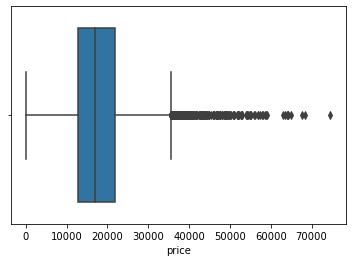

In [43]:
sns.boxplot(df.price)

<AxesSubplot:xlabel='price', ylabel='Density'>

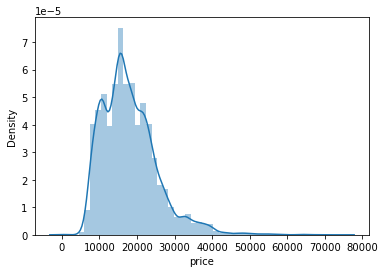

In [44]:
sns.distplot(df.price)

<div class="alert alert-block alert-success">
<p>The target label.</p></div>

## 5 - vat

In [45]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

## 6 - km

In [46]:
df.km.value_counts(dropna=False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

In [47]:
df.km = df.km.str.replace(",", "").str.extract("(\d{1,8})").astype("float")

In [48]:
df.km.value_counts(dropna=False)

10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: km, Length: 6690, dtype: int64

## 7 - registration 

In [49]:
df.registration.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [50]:
df.drop("registration", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>We will use first registration so there is no need for this column.</p></div>

## 8 - prew_owner 

In [51]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [52]:
df.drop("prev_owner", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>We will use Previous Owners so there is no need for this column.</p></div>

## 9 - kW

In [53]:
df.kW.value_counts(dropna=False)

AttributeError: 'DataFrame' object has no attribute 'kW'

In [58]:
df.drop("kw", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 10 - hp

In [55]:
df.hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
84 kW        1
195 kW       1
44 kW        1
239 kW       1
9 kW         1
Name: hp, Length: 81, dtype: int64

In [56]:
df.hp = df.hp.str.extract("(\d{1,4})").astype("float")

In [57]:
df.hp.value_counts(dropna=False)

85.0     2542
66.0     2122
81.0     1402
100.0    1308
110.0    1112
         ... 
84.0        1
195.0       1
44.0        1
239.0       1
9.0         1
Name: hp, Length: 81, dtype: int64

## 12 - type

In [59]:
df.type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                 3475
[, Used, , Diesel]                                                                                                      2516
[, Used, , Gasoline]                                                                                                    2367
[, Used, , Super 95]                                                                                                    1818
[, Pre-registered, , Super 95]                                                                                           500
                                                                                                                        ... 
[, New, , Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95]       1
[, Used, , Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98 (Particulate Filter)]                               1


In [60]:
df.type = df.type.str[1]

In [61]:
df.type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

## 12 - previous_owners

In [62]:
df.previous_owners.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n111 g CO2/km (comb)\n]                                                                1
[\n1\n, \nEuro 6\n]                                                                             1
[\n2\n, \n119 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.6 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.7 l/100 km (country), \n]       1
[\n2\n, \n137 g CO2/

In [63]:
df.previous_owners = [item[0] if type(item) == list else item for item in df.previous_owners]  # let's rename and appyl my method

In [64]:
df.previous_owners = df.previous_owners.str.strip("\n").astype('float')

In [65]:
df.previous_owners.value_counts(dropna=False)

1.0    8294
NaN    6640
2.0     778
0.0     188
3.0      17
4.0       2
Name: previous_owners, dtype: int64

## 15 - next_inspection

In [66]:
df.next_inspection.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                       12384
\n04/2022\n                                  62
\n03/2021\n                                  38
\n03/2022\n                                  36
\n06/2021\n                                  34
                                          ...  
[\n12/2018\n, \n97 g CO2/km (comb)\n]         1
[\n03/2022\n, \n1 (No sticker)\n]             1
[\n05/2021\n, \n93 g CO2/km (comb)\n]         1
[\n06/2021\n, \n93 g CO2/km (comb)\n]         1
[\n01/2022\n, \n168 g CO2/km (comb)\n]        1
Name: next_inspection, Length: 1400, dtype: int64

In [67]:
df.drop("next_inspection", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>We will use Inspection New so there is no need for this column.</p></div>

## 15 - inspection_new

In [68]:
df.inspection_new.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]            1
[\nYes\n, \n, 6.8 l/100 km (comb), \n, 8.5 l/100 km (city), \n, 6.1 l/100 km (country), \n]        1
[\nYes\n, \n, 4.1 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]        1
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.8 l/100 km (city), \n, 4.3 l/100 km (country), \n]

In [69]:
df.inspection_new = df.inspection_new.apply(lambda x : x[0] if type(x) == list else x).str.strip("\n")

In [70]:
df.inspection_new.value_counts(dropna=False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

## 16 - warranty

In [71]:
df.warranty.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                5420
[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
                                                                                                   ... 
[\n72 months\n, \n125 g CO2/km (comb)\n]                                                              1
[\n60 months\n, \n14 g CO2/km (comb)\n]                                                               1
[\n24 months\n, \n121 g CO2/km (comb)\n]                                                              1
[\n12 months\n, \nEuro 6d\n]                                    

In [72]:
df.warranty=df.warranty.apply(lambda x:x[0] if type(x)==list else x).str.strip("\n").str.extract("(\d{1,2})").astype("float")
df.warranty

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
15914    24.0
15915     NaN
15916     NaN
15917     NaN
15918     NaN
Name: warranty, Length: 15919, dtype: float64

In [73]:
df.warranty.value_counts(dropna=False)

NaN     11066
12.0     2594
24.0     1118
60.0      401
36.0      279
48.0      149
6.0       125
72.0       59
3.0        33
23.0       11
18.0       10
20.0        7
25.0        6
2.0         5
50.0        4
26.0        4
16.0        4
4.0         3
1.0         3
19.0        3
34.0        3
13.0        3
28.0        2
22.0        2
14.0        2
11.0        2
46.0        2
21.0        2
9.0         2
17.0        2
45.0        2
33.0        1
40.0        1
65.0        1
10.0        1
15.0        1
7.0         1
8.0         1
56.0        1
49.0        1
47.0        1
30.0        1
Name: warranty, dtype: int64

## 17 - full_service

In [74]:
df.full_service.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n80 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n84 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]           1
[\n, \n, \n, 4.9 l/100 km (comb), \n, 6.2 l/100 km (city), \n, 4.1 l/100 km (country), \n]       1
[\n, \n, \

In [75]:
df.drop("full_service", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 18 - non_smoking_vehicle

In [76]:
df.non_smoking_vehicle.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
                                                                                              ... 
[\n, \n, \n, 5.6 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.7 l/100 km (country), \n]       1
[\n, \n, \n122 g CO2/km (comb)\n]                                                                1
[\n, \n, \n158 g CO2/km (comb)\n]                                                                1
[\n, \n, \n150 g CO2/km (comb)\n]                                                                1
[\n, \n, \

In [77]:
df.drop("non_smoking_vehicle", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 19 - null

In [78]:
df.null.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]    15919
Name: null, dtype: int64

In [79]:
df.drop("null", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 20 - make

In [80]:
df.make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: make, dtype: int64

In [81]:
df.make = df.make.str.strip("\n")
df.make

0           Audi
1           Audi
2           Audi
3           Audi
4           Audi
          ...   
15914    Renault
15915    Renault
15916    Renault
15917    Renault
15918    Renault
Name: make, Length: 15919, dtype: object

In [82]:
df.make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

In [83]:
# df.drop("make", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>We will use make_model so there is no need for this column.</p></div>

## 21 - model

In [84]:
df.model.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: model, dtype: int64

In [85]:
df.model = df.model.str[1]

In [86]:
df.model.value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

In [87]:
# df.drop("model", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>We will use make_model so there is no need for this column.</p></div>

## 22 - offer_number

In [88]:
df.offer_number.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                               3175
[\nLT67679\n]                                       27
[\nUN89904\n]                                       27
[\nXJ38068\n]                                       27
[\nJV03654\n]                                       27
                                                  ... 
[\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n]       1
[\n6701576\n]                                        1
[\n6701569\n]                                        1
[\n158121\n]                                         1
[\nRe_30000008029\n]                                 1
Name: offer_number, Length: 11441, dtype: int64

In [89]:
df.drop("offer_number", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 22 - first_registration

In [90]:
df.first_registration.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: first_registration, dtype: int64

In [91]:
df.first_registration = df.first_registration.str[1].astype("float")

In [92]:
df.first_registration

0        2016.0
1        2017.0
2        2016.0
3        2016.0
4        2016.0
          ...  
15914       NaN
15915    2019.0
15916    2019.0
15917    2019.0
15918    2019.0
Name: first_registration, Length: 15919, dtype: float64

In [93]:
df['age'] = 2019 - df.first_registration

In [94]:
df.age.value_counts(dropna=False) 

1.0    4522
3.0    3674
2.0    3273
0.0    2853
NaN    1597
Name: age, dtype: int64

In [95]:
df.drop("first_registration", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Now that the age column has been created, first_reg. we can drop it..</p></div>


## 23 - body_color

In [96]:
df.body_color.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: body_color, dtype: int64

In [97]:
df.body_color = df.body_color.str[1]

In [98]:
df.body_color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

## 24 - paint_type

In [99]:
df.paint_type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: paint_type, dtype: int64

In [100]:
df.paint_type = df.paint_type.str[0].str.strip("\n")

In [101]:
df.paint_type.value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

## 25 - body_color_original

In [102]:
df.body_color_original.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                    3759
[\nOnyx Schwarz\n]                      338
[\nBianco\n]                            282
[\nMythosschwarz Metallic\n]            238
[\nBrillantschwarz\n]                   216
                                       ... 
[\nRouge-Braun (G0Y)\n]                   1
[\nVARI COLRI DISPONIBILI\n]              1
[\nKokosnussbraun Metallic\n]             1
[\nFarbe frei wählbar\n]                  1
[\nPerlmutt-Weiß Metallic (Weiß)\n]       1
Name: body_color_original, Length: 1928, dtype: int64

In [103]:
df.drop("body_color_original", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>There are expressions in German we can drop it..</p></div>


## 26 - upholstery

In [104]:
df.upholstery.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nVelour, Gre

In [105]:
df.upholstery = df.upholstery.apply(lambda x: x[0] if type(x) == list else x).str.strip("\n").str.split(", ")

In [106]:
df.upholstery.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Cloth, Black]           5821
NaN                      3720
[Part leather, Black]    1121
[Cloth]                  1005
[Cloth, Grey]             891
[Cloth, Other]            639
[Full leather, Black]     575
[Black]                   491
[Grey]                    273
[Other, Other]            182
[Part leather]            140
[Full leather]            139
[Full leather, Brown]     116
[Part leather, Grey]      116
[Other, Black]            110
[Full leather, Other]      72
[Full leather, Grey]       67
[Part leather, Other]      65
[Other]                    56
[Part leather, Brown]      50
[alcantara, Black]         47
[Velour, Black]            36
[Full leather, Beige]      36
[Cloth, Brown]             28
[Velour]                   16
[Other, Grey]              15
[Cloth, Beige]             13
[Brown]                    12
[Cloth, Blue]              12
[Velour, Grey]              8
[Cloth, White]              8
[alcantara, Grey]           6
[Cloth, Red]                5
[Other, Ye

In [107]:
up_type = ["Cloth", 'Part leather', 'Full leather', 'Velour', 'alcantara'] 
df["upholstery_type"] = df["upholstery"].apply(lambda x : x[0] if type(x) == list and x[0] in up_type else np.nan)
# df["upholstery_type"] = [item[0] if type(item) == list and item[0] in up_type else np.nan for item in df.upholstery]

In [108]:
df.upholstery_type.value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

In [109]:
color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def finder(x):
    if type(x) == list and len(x) == 2: return x[1]
    elif type(x) == list and x[0] in color: return x[0]
    else: return np.nan

In [110]:
df["upholstery_color"] = df.upholstery.apply(finder)

In [111]:
df.upholstery_color.value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64

In [112]:
df.drop("upholstery", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Since we have created upholstery_colar and upholstery_type, we can drop upholstery.
</p></div>


## 27 - body

In [113]:
df.body.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: body, dtype: int64

In [114]:
df.body = df.body.str[1]

In [115]:
df.body.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body, dtype: int64

In [116]:
df.drop("body", axis = 1, inplace = True)


<div class="alert alert-block alert-danger">
<p>The same values as the body_type column.</p></div>


## 28 - nr_of_doors

In [117]:
df.nr_of_doors.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n1\n]        1
[\n7\n]        1
Name: nr_of_doors, dtype: int64

In [118]:
df.nr_of_doors = df.nr_of_doors.str[0].str.strip("\n").astype("float")

In [119]:
df.nr_of_doors.value_counts(dropna=False)

5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

## 29 - nr_of_seats

In [120]:
df.nr_of_seats.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: nr_of_seats, dtype: int64

In [121]:
df.nr_of_seats = df.nr_of_seats.str[0].str.strip("\n").astype("float")

In [122]:
df.nr_of_seats.value_counts(dropna=False)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

## 30 - model_code 

In [123]:
df.model_code.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n0035/AVN\n]        1
[\n0035/BEM\n]        1
[\n0035/BAG\n]        1
[\n0035/BAA\n]        1
[\n3333/BKG\n]        1
Name: model_code, Length: 233, dtype: int64

In [124]:
df.drop("model_code", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 31 - gearing_type

In [125]:
df.gearing_type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: gearing_type, dtype: int64

In [126]:
df.gearing_type = df.gearing_type.str[1]

In [127]:
df.gearing_type.value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

## 32 - displacement

In [128]:
df.displacement.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,598 cc\n]    4761
[\n999 cc\n]      2438
[\n1,398 cc\n]    1314
[\n1,399 cc\n]     749
[\n1,229 cc\n]     677
                  ... 
[\n122 cc\n]         1
[\n1,198 cc\n]       1
[\n1,195 cc\n]       1
[\n2,967 cc\n]       1
[\n1,800 cc\n]       1
Name: displacement, Length: 78, dtype: int64

In [129]:
df.displacement = df.displacement.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,5})').astype("float")

In [130]:
df.displacement.value_counts(dropna=False)

1598.0    4761
999.0     2438
1398.0    1314
1399.0     749
1229.0     677
          ... 
122.0        1
1198.0       1
1195.0       1
2967.0       1
1800.0       1
Name: displacement, Length: 78, dtype: int64

## 33 - cylinders

In [131]:
df.cylinders.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: cylinders, dtype: int64

In [132]:
df.cylinders = df.cylinders.str[0].str.strip('\n').astype("float")

In [133]:
df.cylinders.value_counts(dropna=False)

4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: cylinders, dtype: int64

## 34 - weight

In [134]:
df.weight.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,960 kg\n]       1
[\n1,258 kg\n]       1
[\n1,167 kg\n]       1
[\n1,331 kg\n]       1
[\n2,037 kg\n]       1
Name: weight, Length: 435, dtype: int64

In [135]:
df.weight = df.weight.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,6})').astype('float')

In [136]:
df.weight.value_counts(dropna=False)

NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
1960.0       1
1258.0       1
1167.0       1
1331.0       1
2037.0       1
Name: weight, Length: 435, dtype: int64

## 35 - drive chain

In [137]:
df.drive_chain.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: drive_chain, dtype: int64

In [138]:
df.drive_chain = df.drive_chain.str[0].str.strip("\n")

In [139]:
df.drive_chain.value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

## 36 - fuel

In [140]:
df.fuel.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]                                                                                                     3338
[\n, Gasoline, \n]                                                                                                     3175
[\n, Diesel, \n]                                                                                                       2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                 424
                                                                                                                       ... 
[\n, Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91, \n]                                                          1
[\n, Super Plus 98 / Super E10 95, \n]                                                                                    1
[\n, Reg

In [141]:
df.fuel = df.fuel.str[1].str.split("/").str[0].str.strip()

In [142]:
 df.fuel.value_counts(dropna=False)

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: fuel, dtype: int64

In [143]:
benzine = ["Gasoline", "Super 95","Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
lpg = ["LPG","Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]
def fueltype(x):
    if x in benzine: return "Benzine"
    elif x in lpg: return "LPG/CNG"
    else:return x

In [144]:
df.fuel = df.fuel.apply(fueltype)

In [145]:
 df.fuel.value_counts(dropna=False)

Benzine                              8198
Diesel (Particulate Filter)          4315
Diesel                               2984
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
LPG/CNG                                51
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
CNG (Particulate Filter)                3
Others (Particulate Filter)             1
Name: fuel, dtype: int64

## 37 - consumption

In [146]:
df.consumption.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                 1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                 1
[\n, 6.3 l/100 km (comb), \n, \n, \n]                                                    1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]         1

In [147]:
df.consumption = df.consumption.astype("str")

In [148]:
pd.DataFrame(df.consumption)

consumption
0      [['3.8 l/100 km (comb)'], ['4.3 l/100 km (city...
1      [['5.6 l/100 km (comb)'], ['7.1 l/100 km (city...
2      [['3.8 l/100 km (comb)'], ['4.4 l/100 km (city...
3      [['3.8 l/100 km (comb)'], ['4.3 l/100 km (city...
4      [['4.1 l/100 km (comb)'], ['4.6 l/100 km (city...
...                                                  ...
15914  [['5.3 l/100 km (comb)'], ['6.2 l/100 km (city...
15915  ['\n', '7.4 l/100 km (comb)', '\n', '9.2 l/100...
15916  [['5.3 l/100 km (comb)'], ['6.2 l/100 km (city...
15917  [['5.3 l/100 km (comb)'], ['6.2 l/100 km (city...
15918  [['6.8 l/100 km (comb)'], ['8.7 l/100 km (city...

[15919 rows x 1 columns]

In [149]:
df['cons_comb'] = df.consumption.str.extract('(\d.\d|\d).+com', expand=True).astype(float) # ???
df['cons_city'] = df.consumption.str.extract('(\d.\d|\d).+ci', expand=True).astype(float)
df['cons_country'] = df.consumption.str.extract('(\d.\d|\d).+cou', expand=True).astype(float)

In [150]:
df["cons_comb"].value_counts(dropna=False).head()


NaN    2033
5.4     770
3.9     733
4.0     717
5.1     657
Name: cons_comb, dtype: int64

In [151]:
df["cons_city"].value_counts(dropna=False).head()


NaN    2436
5.4     726
3.9     721
4.0     709
5.1     615
Name: cons_city, dtype: int64

In [152]:
df["cons_country"].value_counts(dropna=False).head()


NaN    2376
5.4     730
3.9     722
4.0     710
5.1     619
Name: cons_country, dtype: int64

In [153]:
df.drop("consumption", axis=1, inplace=True)

## 38 - co2_emission

In [154]:
df.co2_emission.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                            1808
[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
                               ... 
[\n14 g CO2/km (comb)\n]          1
[\n1,060 g CO2/km (comb)\n]       1
[\n51 g CO2/km (comb)\n]          1
[\n165 g CO2/km (comb)\n]         1
[\n193 g CO2/km (comb)\n]         1
Name: co2_emission, Length: 124, dtype: int64

In [155]:
[item[0] if type(item) == list else item for item in df.co2_emission]


['\n99 g CO2/km (comb)\n',
 '\n129 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n109 g CO2/km (comb)\n',
 '\n92 g CO2/km (comb)\n',
 '\n98 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 nan,
 '\n105 g CO2/km (comb)\n',
 '\n112 g CO2/km (comb)\n',
 '\n112 g CO2/km (comb)\n',
 nan,
 '\n99 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n92 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n103 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n105 g CO2/km (comb)\n',
 '\n112 g CO2/km (comb)\n',
 '\n112 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n102 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n102 g CO2/km (comb)\n',
 nan,
 '\n95 g CO2/km (comb)\n',
 '\n104 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n104 g CO2/km (comb)\n',
 '\n104 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\

In [156]:
df.co2_emission = [item[0] if type(item) == list else item for item in df.co2_emission] 
df.co2_emission.head()

0     \n99 g CO2/km (comb)\n
1    \n129 g CO2/km (comb)\n
2     \n99 g CO2/km (comb)\n
3     \n99 g CO2/km (comb)\n
4    \n109 g CO2/km (comb)\n
Name: co2_emission, dtype: object

In [157]:
df.co2_emission = df.co2_emission.str.strip("\n").str.rstrip(" g CO2/km (comb)").str.replace(",", ".").astype("float")

In [158]:
df.co2_emission.value_counts(dropna=False)

NaN        2436
120.000     740
99.000      545
97.000      537
104.000     501
           ... 
990.000       1
12.324        1
1.060         1
51.000        1
193.000       1
Name: co2_emission, Length: 121, dtype: int64

## 39 - emission_class

In [159]:
df.emission_class.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: emission_class, dtype: int64

In [160]:
df.emission_class = [i[0] if type(i) == list else i for i in df.emission_class]

In [161]:
df.emission_class

0              \nEuro 6\n
1              \nEuro 6\n
2              \nEuro 6\n
3              \nEuro 6\n
4              \nEuro 6\n
               ...       
15914                 NaN
15915                 NaN
15916    \nEuro 6d-TEMP\n
15917          \nEuro 6\n
15918          \nEuro 6\n
Name: emission_class, Length: 15919, dtype: object

In [162]:
df.emission_class = df.emission_class.str.strip("\n")

In [163]:
df.emission_class.value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [164]:
df.replace({"emission_class" : {"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}}, regex = True, inplace = True)

In [165]:
df.emission_class.value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission_class, dtype: int64

## 40 - comfort_convenience

In [166]:
df.comfort_convenience.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                

In [167]:
df.comfort_convenience = [",".join(item) if type(item) == list else item for item in df.comfort_convenience] # ????

In [168]:
df.comfort_convenience.head(20)

0     Air conditioning,Armrest,Automatic climate con...
1     Air conditioning,Automatic climate control,Hil...
2     Air conditioning,Cruise control,Electrical sid...
3     Air suspension,Armrest,Auxiliary heating,Elect...
4     Air conditioning,Armrest,Automatic climate con...
5     Air conditioning,Armrest,Automatic climate con...
6     Air conditioning,Armrest,Automatic climate con...
7     Air conditioning,Armrest,Electrical side mirro...
8                        Air conditioning,Power windows
9                                                   NaN
10    Air conditioning,Multi-function steering wheel...
11    Air conditioning,Automatic climate control,Ele...
12    Air conditioning,Armrest,Automatic climate con...
13    Air conditioning,Automatic climate control,Cru...
14    Air conditioning,Automatic climate control,Cru...
15    Air conditioning,Armrest,Cruise control,Electr...
16    Air conditioning,Leather steering wheel,Power ...
17    Air conditioning,Automatic climate control

In [169]:
df.comfort_convenience.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

## 41 - entertainment_media

In [170]:
df.entertainment_media.value_counts(dropna=False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                 1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                    1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]     783
[On-board computer, Radio]                                                           487
Name: entertainment_media, dtype: int64

In [171]:
df.entertainment_media =[",".join(item) if type(item) == list else item for item in df.entertainment_media]  

In [172]:
df.entertainment_media.value_counts(dropna=False).head()

NaN                                                                         1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     783
On-board computer,Radio                                                      487
Name: entertainment_media, dtype: int64

## 42 - extras

In [173]:
df.extras.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                                                                                     3245
NaN                                                                                                                2962
[Alloy wheels, Touch screen]                                                                                        697
[Alloy wheels, Voice Control]                                                                                       577
[Alloy wheels, Touch screen, Voice Control]                                                                         541
                                                                                                                   ... 
[Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Voice Control]       1
[Alloy wheels, Catalytic Converter, Roof rack, Sport package, Sport seats, Trailer hitch]                             1
[Alloy wheels, Catalytic Converter, Ski 

In [210]:
df.extras = df.extras.apply(lambda item: ",".join(item) if type(item) == list else item)

In [211]:
df.extras.value_counts(dropna = False).head()

Alloy wheels                               3245
NaN                                        2962
Alloy wheels,Touch screen                   697
Alloy wheels,Voice Control                  577
Alloy wheels,Touch screen,Voice Control     541
Name: extras, dtype: int64

## 43 - safety_security

In [176]:
df.safety_security.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                  982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                        

In [212]:
df.safety_security = df.safety_security.apply(lambda item: ",".join(item) if type(item) == list else item)

In [213]:
df.safety_security.value_counts(dropna = False).head()

NaN                                                                                                                                                                                                                                                        982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                               538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                          480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights         

## 44 - description

In [179]:
df.description.value_counts(dropna = False).head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [180]:
df.drop("description", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 45 - emission_label

In [181]:
df.emission_label.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: emission_label, dtype: int64

In [182]:
df.drop("emission_label", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 46 - gears

In [183]:
df.gears.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: gears, dtype: int64

In [184]:
df.gears = df.gears.str[0].str.strip('\n')

In [185]:
df.gears.value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: gears, dtype: int64

## 47 - country_version

In [186]:
df.country_version.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nSerbia\n]               1
Name: country_version, dtype: int64

In [187]:
df.country_version = df.country_version.str[0].str.strip('\n')

In [188]:
df.country_version.value_counts(dropna=False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_version, dtype: int64

## 48 - electricity_consumption

In [189]:
df.electricity_consumption.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                          15782
[\n0 kWh/100 km (comb)\n]      137
Name: electricity_consumption, dtype: int64

In [190]:
df.drop("electricity_consumption", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 49 - last_service_date

In [191]:
df.last_service_date.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                       15353
[\n02/2019\n, \nEuro 6\n]                    23
[\n05/2019\n, \nEuro 6\n]                    16
[\n01/2018\n, \n118 g CO2/km (comb)\n]       15
[\n03/2019\n, \nEuro 6\n]                    15
                                          ...  
[\n01/2017\n, \n95 g CO2/km (comb)\n]         1
[\n06/2019\n, \n87 g CO2/km (comb)\n]         1
[\n10/2018\n, \n100 g CO2/km (comb)\n]        1
[\n02/2018\n, \n97 g CO2/km (comb)\n]         1
[\n03/2019\n, \n120 g CO2/km (comb)\n]        1
Name: last_service_date, Length: 267, dtype: int64

In [192]:
df.drop("last_service_date", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 50 - other_fuel_types

In [193]:
df.other_fuel_types.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN             15039
[[], [], []]      880
Name: other_fuel_types, dtype: int64

In [194]:
df.drop("other_fuel_types", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 51 - availability

In [195]:
df.availability.value_counts(dropna=False)

NaN                              15284
\nin 90 days from ordering\n       196
\nin 120 days from ordering\n      182
\nin 1 day from ordering\n          51
\nin 5 days from ordering\n         35
\nin 3 days from ordering\n         35
\nin 180 days from ordering\n       24
\nin 14 days from ordering\n        24
\nin 7 days from ordering\n         20
\nin 150 days from ordering\n       18
\nin 2 days from ordering\n         16
\nin 60 days from ordering\n        13
\nin 42 days from ordering\n        10
\nin 21 days from ordering\n         8
\nin 4 days from ordering\n          2
\nin 6 days from ordering\n          1
Name: availability, dtype: int64

In [196]:
df.drop("availability", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 52 - last_timing_belt_service_date

In [201]:
df['last_timing_belt_service_date'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                          15903
[\n04/2016\n]                    2
[\n12/1900\n]                    1
[\n07/2018\n]                    1
[\n01/1900\n]                    1
[\n05/2019\n]                    1
[\n09/2018\n]                    1
[\n05/2018\n, \nEuro 6\n]        1
[\n06/2017\n]                    1
[\n01/2019\n]                    1
[\n02/2019\n]                    1
[\n02/2018\n]                    1
[\n06/2019\n]                    1
[\n01/2018\n]                    1
[\n04/2019\n]                    1
[\n01/1970\n]                    1
Name: last_timing_belt_service_date, dtype: int64

In [202]:
df.drop("last_timing_belt_service_date", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

## 53 - available_from

In [203]:
df.available_from.value_counts(dropna=False)

NaN             15647
\n31/08/19\n       98
\n30/07/19\n       25
\n15/08/19\n       24
\n16/09/19\n       14
\n29/06/19\n       12
\n01/07/19\n       11
\n28/06/19\n       10
\n19/08/19\n        7
\n10/09/19\n        6
\n26/06/19\n        5
\n27/06/19\n        5
\n10/11/19\n        5
\n08/07/19\n        4
\n15/07/19\n        3
\n25/10/19\n        3
\n01/08/19\n        3
\n04/07/19\n        2
\n05/08/19\n        2
\n24/08/19\n        2
\n16/07/19\n        2
\n20/07/19\n        2
\n05/07/19\n        2
\n30/06/19\n        2
\n30/09/19\n        1
\n31/10/19\n        1
\n27/07/19\n        1
\n02/07/19\n        1
\n10/07/19\n        1
\n19/07/19\n        1
\n24/07/19\n        1
\n29/07/19\n        1
\n29/09/19\n        1
\n18/08/19\n        1
\n14/09/19\n        1
\n18/07/19\n        1
\n16/08/19\n        1
\n24/09/19\n        1
\n17/08/19\n        1
\n10/10/19\n        1
\n06/12/19\n        1
\n03/12/19\n        1
\n05/12/19\n        1
\n11/08/19\n        1
\n10/12/19\n        1
\n01/09/19

In [205]:
df.drop("available_from", axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<p>Useless column. It shouldn't be included in the analysis.</p></div>

In [206]:
df.head(5).T

0  \
make_model                                                     Audi A1   
body_type                                                       Sedans   
price                                                            15770   
vat                                                     VAT deductible   
km                                                             56013.0   
hp                                                                66.0   
type                                                              Used   
previous_owners                                                    2.0   
inspection_new                                                     Yes   
warranty                                                           NaN   
make                                                              Audi   
model                                                               A1   
body_color                                                       Black   
paint_type                                                    Metallic   
nr_of_doors                                                        5.0   
nr_of_seats                                                        5.0   
gearing_type                                                 Automatic   
displacement                                                    1422.0   
cylinders                                                          3.0   
weight                                                          1220.0   
drive_chain                                                      front   
fuel                                       Diesel (Particulate Filter)   
co2_emission                                                      99.0   
emission_class                                                  Euro 6   
comfort_convenience  Air conditioning,Armrest,Automatic climate con...   
entertainment_media  Bluetooth,Hands-free equipment,On-board comput...   
extras               [Alloy wheels, Catalytic Converter, Voice Cont...   
safety_security      [ABS, Central door lock, Daytime running light...   
gears                                                              NaN   
country_version                                                    NaN   
age                                                                3.0   
upholstery_type                                                  Cloth   
upholstery_color                                                 Black   
cons_comb                                                          3.8   
cons_city                                                          3.8   
cons_country                                                       3.8   

                                                                     1  \
make_model                                                     Audi A1   
body_type                                                       Sedans   
price                                                            14500   
vat                                                   Price negotiable   
km                                                             80000.0   
hp                                                               141.0   
type                                                              Used   
previous_owners                                                    NaN   
inspection_new                                                     NaN   
warranty                                                           NaN   
make                                                              Audi   
model                                                               A1   
body_color                                                         Red   
paint_type                                                         NaN   
nr_of_doors                                                        3.0   
nr_of_seats                                                        4.0   
gearing_type                                                 Automatic  

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   hp                   15831 non-null  float64
 6   type                 15917 non-null  object 
 7   previous_owners      9279 non-null   float64
 8   inspection_new       3932 non-null   object 
 9   warranty             4853 non-null   float64
 10  make                 15919 non-null  object 
 11  model                15919 non-null  object 
 12  body_color           15322 non-null  object 
 13  paint_type           10147 non-null  object 
 14  nr_of_doors          15707 non-null  float64
 15  nr_of_seats          14942 non-null 

In [214]:
df.to_csv("clean_scout.csv", index=False)

## Import Libraries and Data

In [ ]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)

In [ ]:
df.to_csv("final_scout_not_dummy.csv", index=False)